In [35]:
%pip install ultralytics matplotlib
%pip install tensorboard standard-imghdr


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: /home/kevin/AI/FRC/Tools/.venv/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: /home/kevin/AI/FRC/Tools/.venv/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:
DATA_FILE = "yolo-training-data/data.yaml"
LOG_LEVEL = "TRACE" # TRACE, DEBUG, INFO, WARNING, ERROR, CRITICAL

In [22]:
# Configure logging

from loguru import logger
import sys
logger.remove()
logger.add(sys.stderr, level=LOG_LEVEL) 

1

2025-06-15 15:00:38.351 | DEBUG    | __main__:check_data:23 - Images: ['video_frame_3408.jpg', 'video_frame_1430.jpg', 'video_frame_0838.jpg', 'video_frame_0357.jpg', 'video_frame_1512.jpg', 'video_frame_0252.jpg', 'video_frame_2271.jpg', 'video_frame_0836.jpg', 'video_frame_2459.jpg', 'video_frame_0787.jpg']
2025-06-15 15:00:38.351 | DEBUG    | __main__:check_data:24 - Labels: ['video_frame_3408.txt', 'video_frame_1430.txt', 'video_frame_0838.txt', 'video_frame_0357.txt', 'video_frame_1512.txt', 'video_frame_0252.txt', 'video_frame_2271.txt', 'video_frame_0836.txt', 'video_frame_2459.txt', 'video_frame_0787.txt']


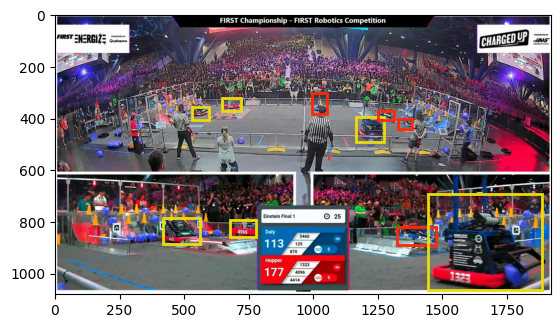

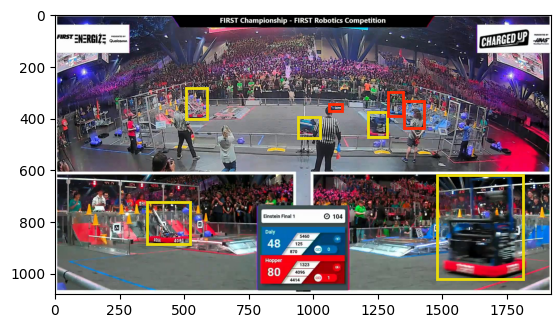

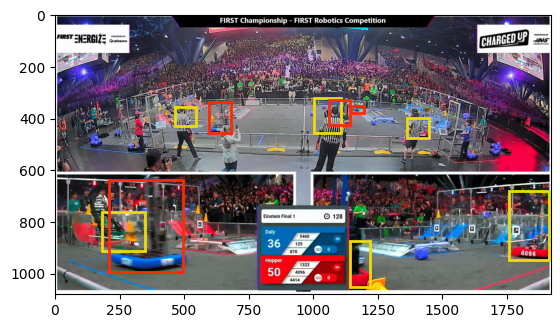

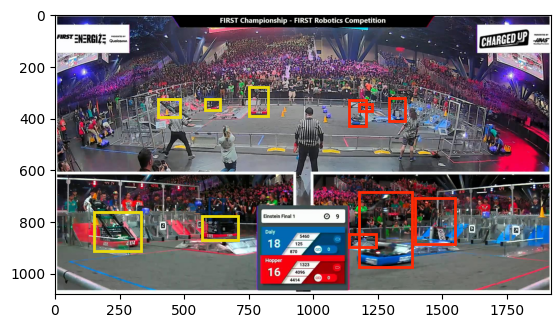

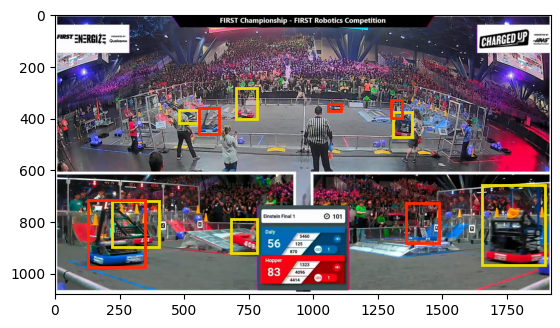

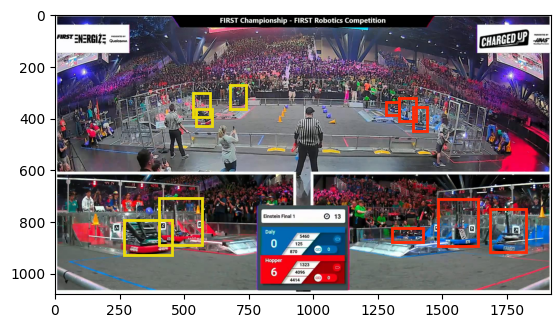

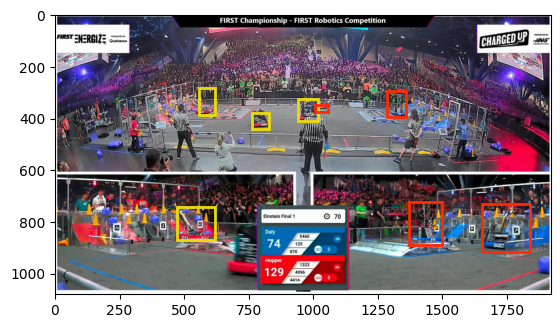

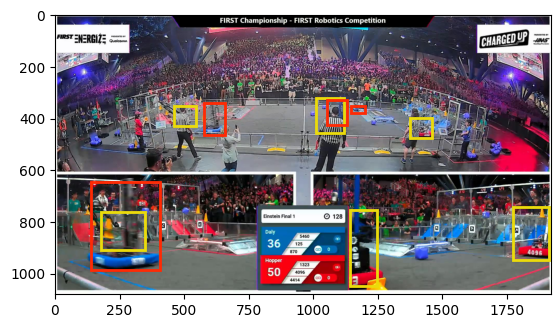

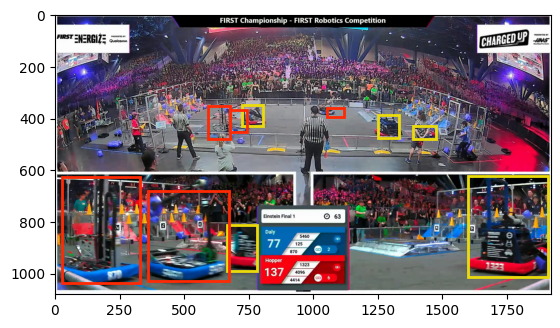

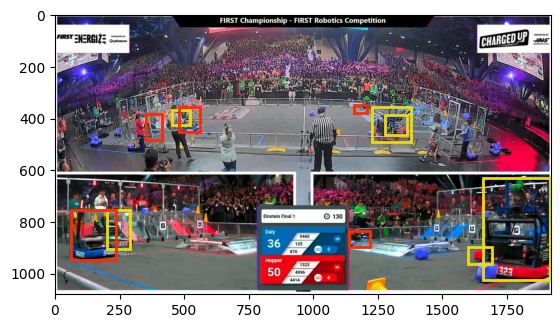

In [48]:
# Optional but recommended: double-check a random sample of training data
%matplotlib inline

from pathlib import Path
import yaml
import random
import os
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from ultralytics.utils.plotting import colors
from PIL import Image

def check_data(data_file: str):
    with open(data_file, "r") as f:
        data = yaml.load(f, yaml.SafeLoader)

    label_map = dict(enumerate(data["names"]))

    # randomly select some training images
    random_images = random.sample(os.listdir(os.path.join(Path(data_file).parent, data["train"], "images")), k=10)
    random_labels = [x.rsplit(".", 1)[0] + ".txt" for x in random_images]
    logger.debug(f"Images: {random_images}")
    logger.debug(f"Labels: {random_labels}")

    for image, label in zip(random_images, random_labels):
        img = np.array(Image.open(os.path.join(Path(data_file).parent, data["train"], "images", image)))
        img_height, img_width = img.shape[:2]
        annotations = []
        with open(os.path.join(Path(data_file).parent, data["train"], "labels", label), encoding="utf-8") as file:
            for line in file:
                class_id, x_center, y_center, width, height = map(float, line.split())
                x = (x_center - width / 2) * img_width
                y = (y_center - height / 2) * img_height
                w = width * img_width
                h = height * img_height
                annotations.append((x, y, w, h, int(class_id)))
        fig, ax = plt.subplots(1)  # Plot the image and annotations
        for x, y, w, h, label in annotations:
            color = tuple(c / 255 for c in colors(label, True))  # Get and normalize the RGB color
            rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor=color, facecolor="none")  # Create a rectangle
            ax.add_patch(rect)
        ax.imshow(img)
        plt.show()
        

check_data(DATA_FILE)

## Tensorboard for visualization

Run this in a terminal with the same environment as the notebook

```
tensorboard --logdir runs # replace with 'runs' directory
```

In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")  # load a pretrained model (recommended for training)
results = model.train(data=DATA_FILE, epochs=100, imgsz=640)

Ultralytics 8.3.155 🚀 Python-3.13.3 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 7817MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=yolo-training-data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tr

train: Scanning /home/kevin/AI/FRC/Tools/yolo-training-data/train/labels... 2879 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2879/2879 [00:01<00:00, 1687.07it/s]

train: New cache created: /home/kevin/AI/FRC/Tools/yolo-training-data/train/labels.cache


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2579.1±1821.0 MB/s, size: 387.2 KB)


val: Scanning /home/kevin/AI/FRC/Tools/yolo-training-data/valid/labels... 822 images, 0 backgrounds, 0 corrupt: 100%|██████████| 822/822 [00:00<00:00, 2288.42it/s]

val: New cache created: /home/kevin/AI/FRC/Tools/yolo-training-data/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.53G      1.835      1.909      1.177        234        640: 100%|██████████| 180/180 [00:18<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 11.97it/s]


                   all        822       7992      0.817      0.718       0.81       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.53G      1.556      1.071      1.077        287        640: 100%|██████████| 180/180 [00:17<00:00, 10.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 13.07it/s]


                   all        822       7992      0.866      0.786      0.858      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.54G      1.474     0.9281      1.054        264        640: 100%|██████████| 180/180 [00:17<00:00, 10.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 13.18it/s]


                   all        822       7992      0.836      0.782      0.861      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.55G      1.425     0.8474      1.043        270        640: 100%|██████████| 180/180 [00:17<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 13.77it/s]


                   all        822       7992      0.894      0.845      0.907      0.551

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.56G      1.372     0.7898      1.025        280        640: 100%|██████████| 180/180 [00:17<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 13.60it/s]


                   all        822       7992      0.918      0.854      0.914      0.552

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.58G      1.339      0.751      1.015        251        640: 100%|██████████| 180/180 [00:17<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 13.80it/s]

                   all        822       7992      0.906      0.849      0.908      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       2.6G        1.3     0.7243      1.008        246        640: 100%|██████████| 180/180 [00:17<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 13.19it/s]


                   all        822       7992      0.901      0.867       0.92      0.581

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.61G      1.265     0.7003      0.998        203        640: 100%|██████████| 180/180 [00:17<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 13.94it/s]

                   all        822       7992      0.915      0.869       0.93      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.63G      1.259     0.6871     0.9921        206        640: 100%|██████████| 180/180 [00:17<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 13.62it/s]

                   all        822       7992      0.902      0.866      0.922      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.64G      1.235     0.6697      0.989        210        640: 100%|██████████| 180/180 [00:17<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.15it/s]

                   all        822       7992       0.92      0.886      0.941      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.65G      1.205     0.6518     0.9758        247        640: 100%|██████████| 180/180 [00:17<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.02it/s]

                   all        822       7992      0.938      0.889      0.946      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.67G      1.188     0.6362     0.9746        210        640: 100%|██████████| 180/180 [00:17<00:00, 10.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.15it/s]

                   all        822       7992      0.927      0.882      0.936      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.69G      1.174     0.6261     0.9655        330        640: 100%|██████████| 180/180 [00:17<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.22it/s]

                   all        822       7992      0.942      0.905      0.956      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       2.7G      1.157     0.6175     0.9624        227        640: 100%|██████████| 180/180 [00:17<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.03it/s]

                   all        822       7992      0.933      0.899      0.955      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.71G      1.131     0.6037      0.956        247        640: 100%|██████████| 180/180 [00:17<00:00, 10.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.02it/s]

                   all        822       7992      0.945      0.892      0.955      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.73G      1.121     0.5987     0.9528        313        640: 100%|██████████| 180/180 [00:17<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.16it/s]

                   all        822       7992      0.939      0.904      0.957      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.74G      1.116     0.5936     0.9485        269        640: 100%|██████████| 180/180 [00:17<00:00, 10.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.00it/s]

                   all        822       7992      0.939      0.911       0.96      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.76G      1.095     0.5824     0.9453        224        640: 100%|██████████| 180/180 [00:17<00:00, 10.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 12.99it/s]

                   all        822       7992      0.943      0.911      0.958      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.77G      1.088     0.5767     0.9425        268        640: 100%|██████████| 180/180 [00:17<00:00, 10.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 13.90it/s]

                   all        822       7992       0.95      0.913      0.964      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.79G      1.073     0.5667     0.9388        204        640: 100%|██████████| 180/180 [00:17<00:00, 10.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.19it/s]

                   all        822       7992      0.947      0.927      0.969      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       2.8G      1.067     0.5626     0.9366        270        640: 100%|██████████| 180/180 [00:17<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 13.58it/s]

                   all        822       7992       0.95      0.925      0.969      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.82G      1.042     0.5494     0.9275        229        640: 100%|██████████| 180/180 [00:17<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.11it/s]

                   all        822       7992       0.96      0.931      0.974       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.83G      1.038     0.5496     0.9256        270        640: 100%|██████████| 180/180 [00:17<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.24it/s]

                   all        822       7992      0.953      0.925      0.969      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.85G      1.024     0.5447     0.9264        280        640: 100%|██████████| 180/180 [00:17<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 13.61it/s]

                   all        822       7992      0.955       0.93       0.97      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.86G      1.013     0.5411      0.921        309        640: 100%|██████████| 180/180 [00:17<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.14it/s]

                   all        822       7992      0.951      0.934      0.971      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.88G      1.007     0.5351     0.9196        200        640: 100%|██████████| 180/180 [00:17<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.40it/s]

                   all        822       7992       0.96       0.93      0.972      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.89G     0.9985     0.5288     0.9177        240        640: 100%|██████████| 180/180 [00:17<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 13.70it/s]

                   all        822       7992      0.964      0.942      0.975      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.91G     0.9839     0.5212      0.912        244        640: 100%|██████████| 180/180 [00:17<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.19it/s]

                   all        822       7992      0.961      0.935      0.975      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.92G     0.9833     0.5194     0.9118        255        640: 100%|██████████| 180/180 [00:17<00:00, 10.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.10it/s]

                   all        822       7992      0.961      0.944      0.978      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.94G      0.965     0.5121      0.907        245        640: 100%|██████████| 180/180 [00:17<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.25it/s]

                   all        822       7992      0.965      0.942      0.979      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.95G     0.9629     0.5071     0.9084        295        640: 100%|██████████| 180/180 [00:17<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.27it/s]

                   all        822       7992      0.965       0.94      0.978      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.97G     0.9469     0.5034     0.9036        343        640: 100%|██████████| 180/180 [00:17<00:00, 10.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 13.30it/s]

                   all        822       7992      0.969      0.946       0.98      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.98G     0.9488     0.5039     0.9015        245        640: 100%|██████████| 180/180 [00:17<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.09it/s]

                   all        822       7992      0.963      0.941      0.976      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100         3G     0.9333     0.4961     0.9018        255        640: 100%|██████████| 180/180 [00:17<00:00, 10.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.27it/s]

                   all        822       7992      0.968       0.95      0.982      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.01G     0.9225     0.4884     0.8946        305        640: 100%|██████████| 180/180 [00:17<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.26it/s]

                   all        822       7992      0.973       0.95      0.983      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.03G     0.9174       0.49      0.895        289        640: 100%|██████████| 180/180 [00:17<00:00, 10.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 13.14it/s]

                   all        822       7992       0.97      0.941       0.98      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.04G     0.9126      0.487     0.8944        242        640: 100%|██████████| 180/180 [00:17<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.09it/s]

                   all        822       7992      0.969      0.942       0.98      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.05G     0.9006     0.4792     0.8941        307        640: 100%|██████████| 180/180 [00:17<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.08it/s]

                   all        822       7992      0.971       0.95      0.982      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.07G     0.8979     0.4799     0.8896        362        640: 100%|██████████| 180/180 [00:17<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.14it/s]

                   all        822       7992      0.972      0.953      0.984      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.08G     0.8945     0.4766     0.8887        258        640: 100%|██████████| 180/180 [00:17<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 13.34it/s]

                   all        822       7992      0.972      0.954      0.984      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100       3.1G     0.8759     0.4698     0.8845        233        640: 100%|██████████| 180/180 [00:17<00:00, 10.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.48it/s]

                   all        822       7992      0.972      0.952      0.984      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.12G     0.8786     0.4694     0.8858        219        640: 100%|██████████| 180/180 [00:17<00:00, 10.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.36it/s]

                   all        822       7992      0.973      0.959      0.985      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.13G     0.8703     0.4647     0.8831        285        640: 100%|██████████| 180/180 [00:17<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.37it/s]

                   all        822       7992      0.977      0.952      0.986      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.14G     0.8608      0.461     0.8809        167        640: 100%|██████████| 180/180 [00:17<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.25it/s]

                   all        822       7992      0.975      0.956      0.985      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.16G     0.8549     0.4584     0.8798        282        640: 100%|██████████| 180/180 [00:17<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.34it/s]

                   all        822       7992      0.972      0.961      0.986       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.17G     0.8433     0.4512     0.8761        310        640: 100%|██████████| 180/180 [00:17<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.33it/s]

                   all        822       7992      0.971      0.959      0.984      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.19G     0.8453     0.4505     0.8786        250        640: 100%|██████████| 180/180 [00:17<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 13.18it/s]

                   all        822       7992      0.976       0.96      0.987       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100       3.2G     0.8406     0.4497     0.8773        236        640: 100%|██████████| 180/180 [00:17<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.21it/s]

                   all        822       7992      0.978      0.959      0.987      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.22G     0.8438     0.4527     0.8764        238        640: 100%|██████████| 180/180 [00:17<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.32it/s]

                   all        822       7992      0.975      0.956      0.987      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.23G     0.8313     0.4474     0.8751        178        640: 100%|██████████| 180/180 [00:17<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.34it/s]

                   all        822       7992      0.978      0.958      0.988      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.25G     0.8296     0.4457     0.8744        319        640: 100%|██████████| 180/180 [00:17<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.07it/s]

                   all        822       7992      0.978      0.963      0.988      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.26G      0.819     0.4396     0.8723        244        640: 100%|██████████| 180/180 [00:17<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.23it/s]

                   all        822       7992      0.976      0.962      0.988      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.28G      0.815     0.4394     0.8721        281        640: 100%|██████████| 180/180 [00:17<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.24it/s]

                   all        822       7992      0.974       0.96      0.987      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.29G     0.8061      0.435     0.8682        278        640: 100%|██████████| 180/180 [00:17<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.40it/s]

                   all        822       7992      0.973       0.96      0.987      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.31G     0.8043     0.4341     0.8677        259        640: 100%|██████████| 180/180 [00:17<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.39it/s]

                   all        822       7992      0.978      0.962      0.988      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.32G     0.7997     0.4306     0.8695        246        640: 100%|██████████| 180/180 [00:17<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.31it/s]

                   all        822       7992      0.981      0.962      0.988      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.34G       0.79     0.4253     0.8652        272        640: 100%|██████████| 180/180 [00:17<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.10it/s]

                   all        822       7992      0.978      0.961      0.988      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.35G     0.7824     0.4236     0.8653        252        640: 100%|██████████| 180/180 [00:17<00:00, 10.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.23it/s]

                   all        822       7992      0.977      0.966      0.988      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.36G     0.7787     0.4191     0.8625        267        640: 100%|██████████| 180/180 [00:17<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.26it/s]

                   all        822       7992      0.976      0.968      0.989      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.38G     0.7733     0.4178     0.8609        276        640: 100%|██████████| 180/180 [00:17<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.30it/s]

                   all        822       7992      0.978      0.965       0.99       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.39G     0.7646     0.4162     0.8589        268        640: 100%|██████████| 180/180 [00:17<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.47it/s]

                   all        822       7992      0.976      0.967      0.989      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.41G     0.7667     0.4157     0.8598        253        640: 100%|██████████| 180/180 [00:17<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.23it/s]

                   all        822       7992      0.976      0.968      0.989      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.43G     0.7709     0.4173     0.8615        278        640: 100%|██████████| 180/180 [00:17<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.25it/s]

                   all        822       7992      0.977      0.968       0.99      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.44G     0.7604      0.413     0.8578        224        640: 100%|██████████| 180/180 [00:17<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 12.73it/s]

                   all        822       7992       0.98      0.966       0.99      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.45G     0.7572     0.4119     0.8593        251        640: 100%|██████████| 180/180 [00:17<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.43it/s]

                   all        822       7992      0.975      0.972       0.99      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.47G      0.746     0.4061      0.857        265        640: 100%|██████████| 180/180 [00:17<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.47it/s]

                   all        822       7992      0.975       0.97      0.989      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.48G     0.7463     0.4045     0.8547        267        640: 100%|██████████| 180/180 [00:17<00:00, 10.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.43it/s]

                   all        822       7992      0.975      0.971       0.99      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100       3.5G     0.7341     0.4002     0.8531        283        640: 100%|██████████| 180/180 [00:17<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.45it/s]

                   all        822       7992      0.978      0.969       0.99      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.51G     0.7349     0.3997      0.853        236        640: 100%|██████████| 180/180 [00:17<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.22it/s]

                   all        822       7992       0.98      0.968       0.99      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.53G     0.7363     0.3997     0.8531        317        640: 100%|██████████| 180/180 [00:17<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 13.59it/s]

                   all        822       7992      0.975      0.972       0.99      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.54G     0.7292     0.3995     0.8539        224        640: 100%|██████████| 180/180 [00:17<00:00, 10.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.04it/s]

                   all        822       7992       0.98      0.969      0.991      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.56G     0.7256     0.3952     0.8504        277        640: 100%|██████████| 180/180 [00:17<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.31it/s]

                   all        822       7992      0.981      0.973       0.99      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.57G     0.7165     0.3926     0.8491        250        640: 100%|██████████| 180/180 [00:17<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.30it/s]

                   all        822       7992      0.977      0.974      0.991      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.59G     0.7217      0.394     0.8502        255        640: 100%|██████████| 180/180 [00:17<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.12it/s]

                   all        822       7992      0.979      0.973      0.991      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100       3.6G     0.7081     0.3886     0.8476        237        640: 100%|██████████| 180/180 [00:17<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.28it/s]

                   all        822       7992      0.981      0.974       0.99      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.62G     0.7125     0.3909     0.8491        232        640: 100%|██████████| 180/180 [00:17<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 13.52it/s]

                   all        822       7992       0.98      0.973       0.99      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.63G     0.7041     0.3864     0.8471        323        640: 100%|██████████| 180/180 [00:17<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 12.73it/s]

                   all        822       7992      0.982      0.972      0.991      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.65G     0.6997     0.3836     0.8465        269        640: 100%|██████████| 180/180 [00:17<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.38it/s]

                   all        822       7992      0.982      0.971      0.991       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.66G      0.696     0.3825     0.8443        232        640: 100%|██████████| 180/180 [00:17<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.37it/s]

                   all        822       7992      0.983      0.975      0.991      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.68G     0.6964     0.3836     0.8452        257        640: 100%|██████████| 180/180 [00:17<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.38it/s]

                   all        822       7992      0.981      0.971      0.991      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.69G     0.6855     0.3775     0.8446        286        640: 100%|██████████| 180/180 [00:17<00:00, 10.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.31it/s]

                   all        822       7992      0.983      0.972      0.991       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.71G     0.6888     0.3778     0.8443        225        640: 100%|██████████| 180/180 [00:17<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.26it/s]

                   all        822       7992      0.983      0.974      0.992       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.72G     0.6815      0.376     0.8449        241        640: 100%|██████████| 180/180 [00:17<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.36it/s]

                   all        822       7992      0.983      0.976      0.992      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.73G     0.6842     0.3777     0.8443        274        640: 100%|██████████| 180/180 [00:17<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.41it/s]

                   all        822       7992       0.98      0.975      0.992      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.75G      0.681     0.3741     0.8435        217        640: 100%|██████████| 180/180 [00:17<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.31it/s]

                   all        822       7992      0.982      0.974      0.992      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.76G     0.6726     0.3717     0.8398        225        640: 100%|██████████| 180/180 [00:17<00:00, 10.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:02<00:00, 12.81it/s]

                   all        822       7992      0.981      0.975      0.991      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.78G     0.6682     0.3704     0.8392        313        640: 100%|██████████| 180/180 [00:17<00:00, 10.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.38it/s]

                   all        822       7992      0.982      0.974      0.992      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.79G     0.6649     0.3688     0.8387        237        640: 100%|██████████| 180/180 [00:17<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.39it/s]

                   all        822       7992       0.98      0.975      0.992      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.81G     0.6617     0.3666     0.8385        317        640: 100%|██████████| 180/180 [00:17<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.35it/s]

                   all        822       7992      0.981      0.973      0.992      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.82G     0.6557     0.3637     0.8386        249        640: 100%|██████████| 180/180 [00:17<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.16it/s]

                   all        822       7992      0.983      0.976      0.992      0.858


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.58G     0.6236     0.3425     0.8273        133        640: 100%|██████████| 180/180 [00:16<00:00, 10.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.41it/s]

                   all        822       7992      0.981      0.975      0.992      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.58G     0.5896      0.328     0.8242        145        640: 100%|██████████| 180/180 [00:16<00:00, 10.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.15it/s]

                   all        822       7992      0.982      0.976      0.992      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.58G     0.5837     0.3275     0.8231        139        640: 100%|██████████| 180/180 [00:16<00:00, 10.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.33it/s]

                   all        822       7992      0.981      0.978      0.992      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.58G     0.5741      0.323     0.8199        145        640: 100%|██████████| 180/180 [00:16<00:00, 10.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.21it/s]

                   all        822       7992      0.983      0.975      0.992      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.58G     0.5663     0.3207     0.8186        145        640: 100%|██████████| 180/180 [00:16<00:00, 10.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.33it/s]

                   all        822       7992      0.982      0.976      0.992      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.58G      0.563     0.3199     0.8184        140        640: 100%|██████████| 180/180 [00:16<00:00, 10.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.34it/s]

                   all        822       7992      0.981      0.979      0.992      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.58G     0.5581     0.3168     0.8175        131        640: 100%|██████████| 180/180 [00:16<00:00, 10.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.42it/s]

                   all        822       7992      0.983      0.977      0.993       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.58G     0.5527     0.3146      0.819        139        640: 100%|██████████| 180/180 [00:16<00:00, 10.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.08it/s]

                   all        822       7992      0.983      0.979      0.992       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.58G      0.549     0.3136     0.8174        144        640: 100%|██████████| 180/180 [00:16<00:00, 10.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.47it/s]

                   all        822       7992      0.981      0.979      0.992      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.58G     0.5427     0.3125     0.8165        140        640: 100%|██████████| 180/180 [00:16<00:00, 10.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:01<00:00, 14.03it/s]

                   all        822       7992      0.982      0.978      0.992      0.862



100 epochs completed in 0.532 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.155 🚀 Python-3.13.3 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 7817MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  8.47it/s]


                   all        822       7992      0.982      0.978      0.992      0.862
             blueRobot        822       3950      0.978      0.972       0.99      0.851
              redRobot        822       4042      0.985      0.985      0.994      0.873
Speed: 0.1ms preprocess, 0.7ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train


: 